# **A/ Crawl Data**
Crark data from tiki website

In [1]:
# import pandas as pd
# import requests
# import time
# import random
# from tqdm import tqdm

# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
#     'Accept': 'application/json, text/plain, */*',
#     'Accept-Language': 'en,vi;q=0.9,vi-VN;q=0.8',
#     'Referer': 'https://tiki.vn/nha-sach-tiki/c8322',
#     'x-guest-token': '2eg3LBsfkKz7pVmEbIO0RGDJvyuAjq8P',
#     'Connection': 'keep-alive',
#     'TE': 'Trailers',
#     'cookies' : '_trackity=egitd3a3fab-1c64-dc2a-90a8-1b295cf588de; TOKENS={%22access_token%22:%222eg3LBsfkKz7pVmEbIO0RGDJvyuAjq8P%22%2C%22expires_in%22:157680000%2C%22expires_at%22:1872394520776%2C%22guest_token%22:%222eg3LBsfkKz7pVmEbIO0RGDJvyuAjq8P%22}; delivery_zone=Vk4wNjcwMDcwMjY=; tiki_client_id=; TIKI_RECOMMENDATION=3c1cbf2a9169320a596dcef977415718; TKSESSID=f74f5d35109ffb184e445005d5f66241'
# }
# params = (
#     ('platform', 'web'),
#     ('spid','74021318'),
#     ('version', '3')
# )
    
# def parser_product(json):
#     d = dict()
#     d['id'] =json.get('id')
#     d['name'] =json.get('name')
#     d['authors'] =json.get("authors", [{}])[0].get("name")
#     d['original_price'] =json.get('original_price')
#     d['price'] =json.get('price')
#     d['categories'] = json.get("categories", {}).get("name")
#     d['all_time_quantity_sold'] =json.get('all_time_quantity_sold')
#     d['rating_average'] =json.get('rating_average')
#     d['review_count'] =json.get('review_count')
#     specifications = json.get("specifications", [])
#     general_info = next((item for item in specifications if item.get("name") == "Thông tin chung"), {})
#     attributes = general_info.get("attributes", [])
#     d['pages'] = next((attr.get("value") for attr in attributes if attr.get("code") == "number_of_page"), None)
#     d['manuafacture'] = next((attr.get("value") for attr in attributes if attr.get("code") == "manufacturer"), None)
#     return d

# df_id = pd.read_csv('productId_book.csv')
# p_ids = df_id.id.to_list()
# print(p_ids)
# result =[]
# for pid in tqdm(p_ids, total=len(p_ids)):
#     response = requests.get('https://tiki.vn/api/v2/products/{}'.format(pid), headers=headers, params=params)
#     if response.status_code == 200:
#         try:
#             # response.encoding = 'utf-8'
#             print('Crawl data {} success !!!'.format(pid))
#             result.append(parser_product(response.json()))
#         except requests.exceptions.JSONDecodeError:
#             print("Lỗi: Phản hồi không phải là JSON hợp lệ.")
#             print("Nội dung phản hồi:", response.text) 
#     else:
#         print(f"Lỗi HTTP {response.status_code}: {response.reason}")

# df_product = pd.DataFrame(result)
# df_product.to_csv('productDetailData.csv', index = False)

# **B/ Build the Models**

# **1. Import Libraries and Frameworks**

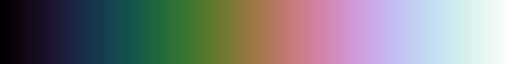

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.color_palette("cubehelix", as_cmap=True)

# **2. Retrieving Data**

In [3]:
df = pd.read_csv("productDetailData.csv")
df.head()

,id,name,authors,original_price,price,categories,all_time_quantity_sold,rating_average,review_count,pages,manuafacture
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,75500,Sách tiếng Việt,72808.0,5.0,13292,244.0,Nhà Xuất Bản Hội Nhà Văn
1,188940817,Vị Thần Của Những Quyết Định,Universe,79000,63000,Sách chiêm tinh - horoscope - khác,2.0,0.0,0,320.0,Nhà Xuất Bản Thế Giới
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,Lê Bảo Ngọc,128000,115000,Sách tư duy - Kỹ năng sống,NaN,0.0,0,296.0,Nhà Xuất Bản Thế Giới
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",Tống Mặc,89000,50730,Sách tiếng Việt,74507.0,4.8,7206,264.0,Nhà Xuất Bản Thế Giới
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",Cao Minh,179000,116000,Truyện ngắn - Tản văn - Tạp Văn Nước Ngoài,25929.0,4.8,5429,424.0,Nhà Xuất Bản Thế Giới


# **3. Cleaning Data**

In [4]:
df.drop("id", axis=1, inplace=True)
df.drop("name", axis=1, inplace=True)
df.drop("authors", axis=1, inplace=True)
df.drop("original_price", axis=1, inplace=True)
df.drop("categories", axis=1, inplace=True)
df.drop("manuafacture", axis=1, inplace=True)
df.head()


,price,all_time_quantity_sold,rating_average,review_count,pages
0,75500,72808.0,5.0,13292,244.0
1,63000,2.0,0.0,0,320.0
2,115000,NaN,0.0,0,296.0
3,50730,74507.0,4.8,7206,264.0
4,116000,25929.0,4.8,5429,424.0


In [5]:
print("Number of Null value in the Data Frame:")
print(df.isnull().sum())

Number of Null value in the Data Frame:
price                       0
all_time_quantity_sold     91
rating_average              0
review_count                0
pages                     231
dtype: int64


In [6]:
print("Number of Duplicated Row in the Data Frame:")
print(df.duplicated().sum())

Number of Duplicated Row in the Data Frame:
2


In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1474 entries, 0 to 1789
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   1474 non-null   int64  
 1   all_time_quantity_sold  1474 non-null   float64
 2   rating_average          1474 non-null   float64
 3   review_count            1474 non-null   int64  
 4   pages                   1474 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 69.1 KB


In [9]:
df.head()

,price,all_time_quantity_sold,rating_average,review_count,pages
0,75500,72808.0,5.0,13292,244.0
1,63000,2.0,0.0,0,320.0
3,50730,74507.0,4.8,7206,264.0
4,116000,25929.0,4.8,5429,424.0
6,55200,34067.0,5.0,5883,228.0


### kiểm tra xem có hàng nào chứa giá trị không phù hợp không, và xóa hàng đó


In [10]:
df = pd.read_csv("df.csv")
df_copy = df.copy()
for count, row in enumerate(df_copy.values):
    for idx, value in enumerate(row):
        if str(value).isalpha():
            print(value)
            print(count)
df.drop(index=1047, inplace=True)

Cuốn
1047


In [11]:
df.pages = df.pages.astype("int")

# **4. Normalize the Data:**

In [12]:
df = (df - df.mean())/df.std()

In [13]:
df.head()

,Unnamed: 0,price,all_time_quantity_sold,rating_average,review_count,pages
0,-1.660346,-0.447426,2.889887,0.309757,16.359397,-0.408070
1,-1.658420,-0.586169,-0.146032,-5.715343,-0.481045,0.015542
2,-1.654567,-0.722360,2.960734,0.068753,8.648674,-0.296594
3,-1.652641,0.002103,0.935091,0.068753,6.397285,0.595221
4,-1.648789,-0.672745,1.274436,0.309757,6.972485,-0.497252


In [14]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
df.head()

,price,all_time_quantity_sold,rating_average,review_count,pages
0,-0.447426,2.889887,0.309757,16.359397,-0.408070
1,-0.586169,-0.146032,-5.715343,-0.481045,0.015542
2,-0.722360,2.960734,0.068753,8.648674,-0.296594
3,0.002103,0.935091,0.068753,6.397285,0.595221
4,-0.672745,1.274436,0.309757,6.972485,-0.497252



# **5. Explore the data**

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

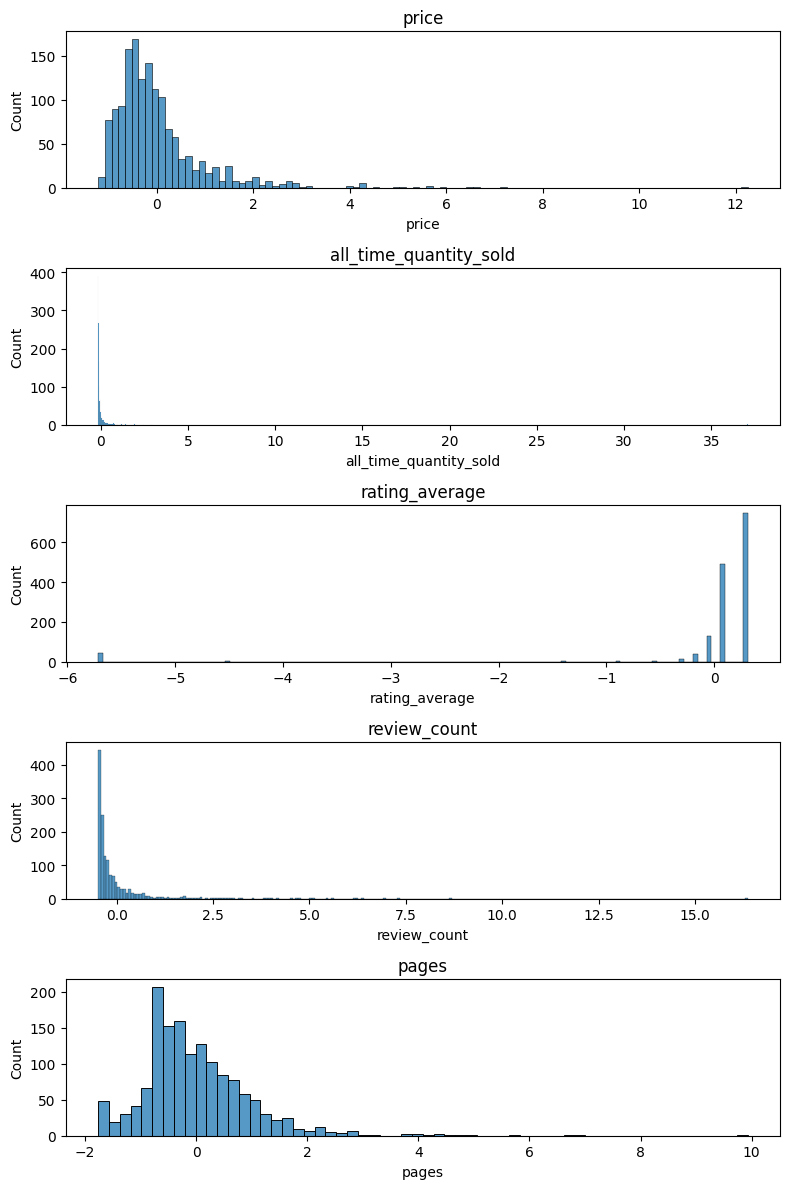

In [16]:
# Tạo một lưới 5x1 cho các biểu đồ
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

# Lặp qua các cột trong DataFrame
for i, column in enumerate(df.columns):
    # Vẽ biểu đồ phân phối của từng cột
    sns.histplot(df[column], ax=axes[i])
    axes[i].set_title(column)  # Đặt tiêu đề cho từng biểu đồ

plt.tight_layout()  # Đảm bảo các biểu đồ không chồng lên nhau



<Axes: >

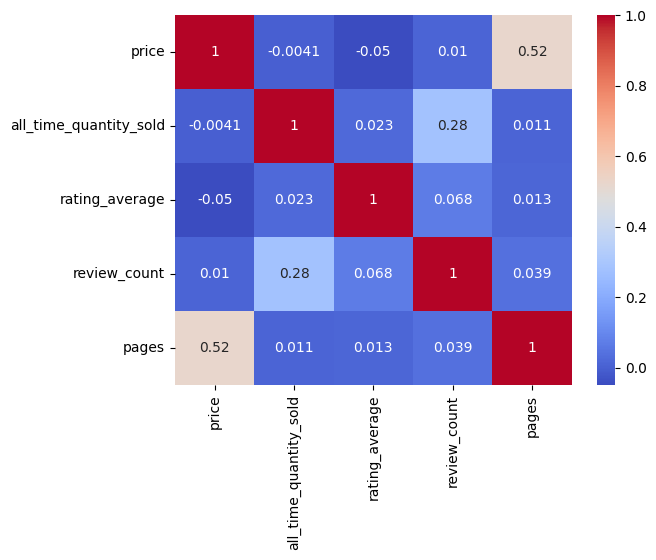

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# **6. Models**

### 6.1. Train Test Split

In [18]:
X = df.drop("all_time_quantity_sold", axis=1)
Y = df.all_time_quantity_sold

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of the Data Sets: ")
print(f"X Train:{x_train.shape}          X Test:{x_test.shape}")
print(f"Y Train:{y_train.shape}           Y Test:{y_test.shape}")

Shape of the Data Sets: 
X Train:(1179, 4)          X Test:(295, 4)
Y Train:(1179,)           Y Test:(295,)


### 6.2. Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
Yhat = lr.predict(x_test)

In [20]:
Accuracy = ((1-mean_squared_error(Yhat, y_test))*100).round(2)
print(f"Linear Regression Accuracy: {Accuracy}%")
print("=> Overfitting")

Linear Regression Accuracy: 98.29%
=> Overfitting


### 6.3. Support Vector Regression 

In [21]:
from sklearn.svm import SVR

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

# Make predictions
Yhat_svr = svr.predict(x_test)

# Evaluate the model
accuracy_svr = ((1 - mean_squared_error(Yhat_svr, y_test)) * 100).round(2)
print(f"SVR Accuracy: {accuracy_svr}%")


SVR Accuracy: 98.07%


### 6.4. Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

# Make predictions
Yhat_dt = dt_regressor.predict(x_test)

# Evaluate the model
accuracy_dt = ((1 - mean_squared_error(Yhat_dt, y_test)) * 100).round(2)
print(f"Decision Tree Regression Accuracy: {accuracy_dt}%")


Decision Tree Regression Accuracy: 97.32%


### 6.5. Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions
Yhat_rf = rf_regressor.predict(x_test)

# Evaluate the model
accuracy_rf = ((1 - mean_squared_error(Yhat_rf, y_test)) * 100).round(2)
print(f"Random Forest Regressor Accuracy: {accuracy_rf}%")


Random Forest Regressor Accuracy: 98.31%
